### プレゼンテーション - 3D CNN Based Automatic Diagnosis of ADHD Using Functional and Structural MRI

  
論文: https://ieeexplore.ieee.org/document/8067637/all-figures

##### 1. 使用するデータセットと教師ラベル

fMRI - fALFF: /Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/*.nii.gz  
sMRI - GM: /Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/*.nii.gz  
教師ラベル: /Users/yasu/school/presentation/datasets/ADHD200/ADHD200_Phenotypic.csv  
画像データの説明: /Users/yasu/school/presentation/datasets/ADHD200/ADHD200のデータについて.txt  
教師ラベルの説明: /Users/yasu/school/presentation/datasets/ADHD200/ADHD-200_PhenotypicKey.pdf  
  
全データ数: 876  
　通常: 692(79%)  
　ADHD: 184(21%)  
訓練データ数: 701(全体の80%)  
　通常:  554(訓練データ80%の内の79%)  
　ADHD: 147(訓練データ80%の内の21%)  
テストデータ数: 175(全体の20%)  
　通常:  138(テストデータ20%の内の79%)  
　ADHD: 37(テストデータ20%の内の21%)  


#### 2. ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import tensorflow as tf
import glob
import cv2
import os
from nilearn import plotting, image
from matplotlib import pyplot as plt
from keras import Sequential
from keras.layers import Conv3D, MaxPooling3D, BatchNormalization
from keras.layers import Dense
from keras.utils import np_utils
from keras import losses, optimizers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

/Users/yasu/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### 3. 機能的MRI - fMRI_fALFFインポート - 訓練・テストと教師ラベル

In [2]:
#C 画像データファイルのインポート

input_fMRI_train_data =  glob.glob("/Users/yasu/school/presentation/datasets/ADHD200/foruse/fMRI/train_data/*.nii.gz")
input_fMRI_test_data =   glob.glob("/Users/yasu/school/presentation/datasets/ADHD200/foruse/fMRI/test_data/*.nii.gz")
input_fMRI_train_label = pd.read_csv("/Users/yasu/school/presentation/datasets/ADHD200/foruse/fMRI/train_label/train_label.csv")
input_fMRI_test_label =  pd.read_csv("/Users/yasu/school/presentation/datasets/ADHD200/foruse/fMRI/test_label/test_label.csv")

1. plot_img
2. plot_stat_map
3. plot_anat
4. plot_roi
5. plot_epi


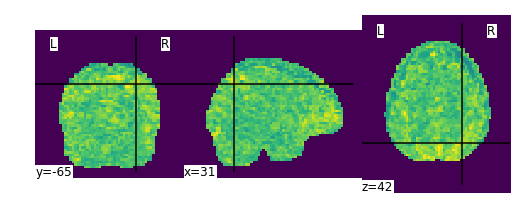

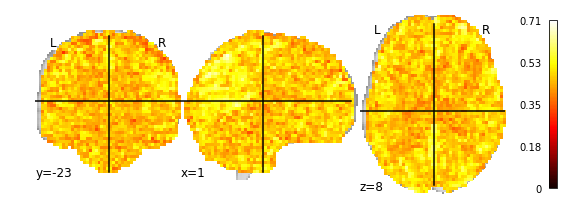

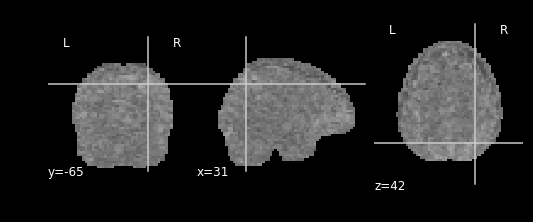

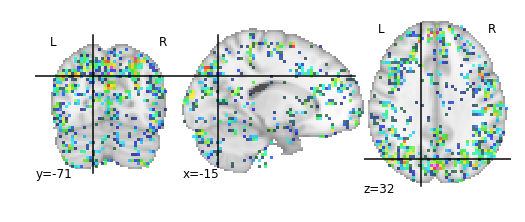

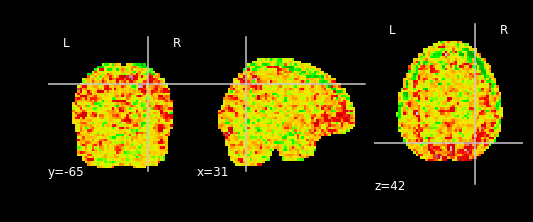

In [5]:
#C 画像データの画像の確認(プロット)

plotting.plot_img(input_fMRI_train_data[0])
print("1. plot_img")
plotting.plot_stat_map(input_fMRI_train_data[0])
print("2. plot_stat_map")
plotting.plot_anat(input_fMRI_train_data[0])
print("3. plot_anat")
plotting.plot_roi(input_fMRI_train_data[0])
print("4. plot_roi")
plotting.plot_epi(input_fMRI_train_data[0])
print("5. plot_epi")

1. plot_img
2. plot_stat_map
3. plot_anat
4. plot_roi
5. plot_epi


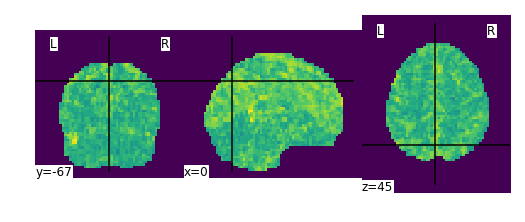

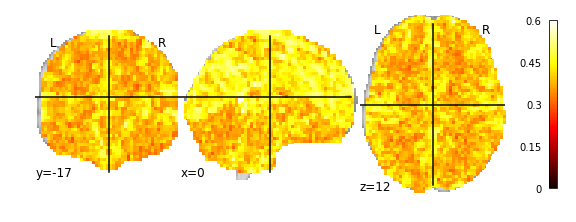

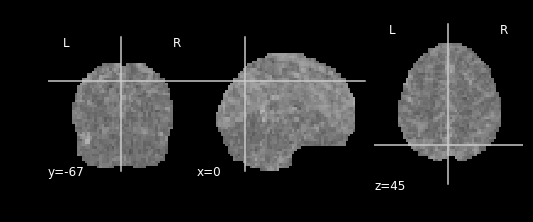

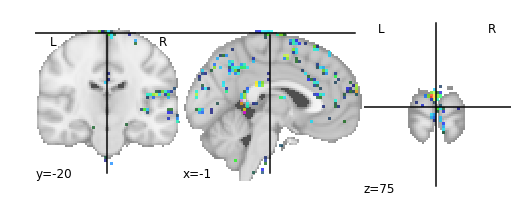

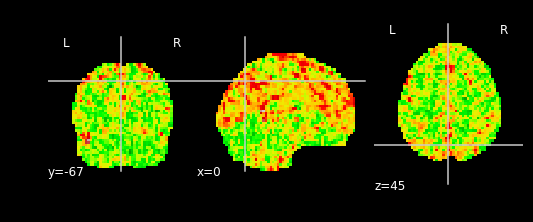

In [6]:
plotting.plot_img(input_fMRI_test_data[0])
print("1. plot_img")
plotting.plot_stat_map(input_fMRI_test_data[0])
print("2. plot_stat_map")
plotting.plot_anat(input_fMRI_test_data[0])
print("3. plot_anat")
plotting.plot_roi(input_fMRI_test_data[0])
print("4. plot_roi")
plotting.plot_epi(input_fMRI_test_data[0])
print("5. plot_epi")

In [7]:
print("train_label_count: ", input_fMRI_train_label.count(), "\ntest_label_count: ", input_fMRI_test_label.count())

train_label_count:  DX    701
dtype: int64 
test_label_count:  DX    175
dtype: int64


In [8]:
#C これは不要
#C 画像データの結合1 - 一つずつ

X_train = image.concat_imgs([
    input_fMRI_train_data[0], input_fMRI_train_data[1], input_fMRI_train_data[2], input_fMRI_train_data[3], 
    input_fMRI_train_data[4], input_fMRI_train_data[5], input_fMRI_train_data[6], input_fMRI_train_data[7], 
    input_fMRI_train_data[8], input_fMRI_train_data[9], input_fMRI_train_data[10], input_fMRI_train_data[11], 
    input_fMRI_train_data[12], input_fMRI_train_data[13], input_fMRI_train_data[14], input_fMRI_train_data[15], 
    input_fMRI_train_data[16], input_fMRI_train_data[17], input_fMRI_train_data[18], input_fMRI_train_data[19], 
    input_fMRI_train_data[20], input_fMRI_train_data[21], input_fMRI_train_data[22], input_fMRI_train_data[23], 
    input_fMRI_train_data[24], input_fMRI_train_data[25], input_fMRI_train_data[26], input_fMRI_train_data[27], 
    input_fMRI_train_data[28], input_fMRI_train_data[29], input_fMRI_train_data[30], input_fMRI_train_data[31], 
    input_fMRI_train_data[32], input_fMRI_train_data[33], input_fMRI_train_data[34], input_fMRI_train_data[35], 
    input_fMRI_train_data[36], input_fMRI_train_data[37], input_fMRI_train_data[38], input_fMRI_train_data[39], 
    input_fMRI_train_data[40], input_fMRI_train_data[41], input_fMRI_train_data[42], input_fMRI_train_data[43], 
    input_fMRI_train_data[44], input_fMRI_train_data[45], input_fMRI_train_data[46], input_fMRI_train_data[47], 
    input_fMRI_train_data[48], input_fMRI_train_data[49], input_fMRI_train_data[50], input_fMRI_train_data[51], 
    input_fMRI_train_data[52], input_fMRI_train_data[53], input_fMRI_train_data[54], input_fMRI_train_data[55], 
    input_fMRI_train_data[56], input_fMRI_train_data[57], input_fMRI_train_data[58], input_fMRI_train_data[59], 
    input_fMRI_train_data[60], input_fMRI_train_data[61], input_fMRI_train_data[62], input_fMRI_train_data[63], 
    input_fMRI_train_data[64], input_fMRI_train_data[65], input_fMRI_train_data[66], input_fMRI_train_data[67], 
    input_fMRI_train_data[68], input_fMRI_train_data[69], input_fMRI_train_data[70], input_fMRI_train_data[71], 
    input_fMRI_train_data[72], input_fMRI_train_data[73], input_fMRI_train_data[74], input_fMRI_train_data[75], 
    input_fMRI_train_data[76], input_fMRI_train_data[77], input_fMRI_train_data[78], input_fMRI_train_data[79], 
    input_fMRI_train_data[80], input_fMRI_train_data[81], input_fMRI_train_data[82], input_fMRI_train_data[83], 
    input_fMRI_train_data[84], input_fMRI_train_data[85], input_fMRI_train_data[86], input_fMRI_train_data[87], 
    input_fMRI_train_data[88], input_fMRI_train_data[89], input_fMRI_train_data[90], input_fMRI_train_data[91], 
    input_fMRI_train_data[92], input_fMRI_train_data[93], input_fMRI_train_data[94], input_fMRI_train_data[95], 
    input_fMRI_train_data[96], input_fMRI_train_data[97], input_fMRI_train_data[98], input_fMRI_train_data[99], 
    input_fMRI_train_data[100], input_fMRI_train_data[101], input_fMRI_train_data[102], input_fMRI_train_data[103], 
    input_fMRI_train_data[104], input_fMRI_train_data[105], input_fMRI_train_data[106], input_fMRI_train_data[107], 
    input_fMRI_train_data[108], input_fMRI_train_data[109], input_fMRI_train_data[110], input_fMRI_train_data[111], 
    input_fMRI_train_data[112], input_fMRI_train_data[113], input_fMRI_train_data[114], input_fMRI_train_data[115], 
    input_fMRI_train_data[116], input_fMRI_train_data[117], input_fMRI_train_data[118], input_fMRI_train_data[119], 
    input_fMRI_train_data[120], input_fMRI_train_data[121], input_fMRI_train_data[122], input_fMRI_train_data[123], 
    input_fMRI_train_data[124], input_fMRI_train_data[125], input_fMRI_train_data[126], input_fMRI_train_data[127], 
    input_fMRI_train_data[128], input_fMRI_train_data[129], input_fMRI_train_data[130], input_fMRI_train_data[131], 
    input_fMRI_train_data[132], input_fMRI_train_data[133], input_fMRI_train_data[134], input_fMRI_train_data[135], 
    input_fMRI_train_data[136], input_fMRI_train_data[137], input_fMRI_train_data[138], input_fMRI_train_data[139], 
    input_fMRI_train_data[140], input_fMRI_train_data[141], input_fMRI_train_data[142], input_fMRI_train_data[143], 
    input_fMRI_train_data[144], input_fMRI_train_data[145], input_fMRI_train_data[146], input_fMRI_train_data[147], 
    input_fMRI_train_data[148], input_fMRI_train_data[149], input_fMRI_train_data[150], input_fMRI_train_data[151], 
    input_fMRI_train_data[152], input_fMRI_train_data[153], input_fMRI_train_data[154], input_fMRI_train_data[155], 
    input_fMRI_train_data[156], input_fMRI_train_data[157], input_fMRI_train_data[158], input_fMRI_train_data[159], 
    input_fMRI_train_data[160], input_fMRI_train_data[161], input_fMRI_train_data[162], input_fMRI_train_data[163], 
    input_fMRI_train_data[164], input_fMRI_train_data[165], input_fMRI_train_data[166], input_fMRI_train_data[167], 
    input_fMRI_train_data[168], input_fMRI_train_data[169], input_fMRI_train_data[170], input_fMRI_train_data[171], 
    input_fMRI_train_data[172], input_fMRI_train_data[173], input_fMRI_train_data[174], input_fMRI_train_data[175], 
    input_fMRI_train_data[176], input_fMRI_train_data[177], input_fMRI_train_data[178], input_fMRI_train_data[179], 
    input_fMRI_train_data[180], input_fMRI_train_data[181], input_fMRI_train_data[182], input_fMRI_train_data[183], 
    input_fMRI_train_data[184], input_fMRI_train_data[185], input_fMRI_train_data[186], input_fMRI_train_data[187], 
    input_fMRI_train_data[188], input_fMRI_train_data[189], input_fMRI_train_data[190], input_fMRI_train_data[191], 
    input_fMRI_train_data[192], input_fMRI_train_data[193], input_fMRI_train_data[194], input_fMRI_train_data[195], 
    input_fMRI_train_data[196], input_fMRI_train_data[197], input_fMRI_train_data[198], input_fMRI_train_data[199], 
    input_fMRI_train_data[200], input_fMRI_train_data[201], input_fMRI_train_data[202], input_fMRI_train_data[203], 
    input_fMRI_train_data[204], input_fMRI_train_data[205], input_fMRI_train_data[206], input_fMRI_train_data[207], 
    input_fMRI_train_data[208], input_fMRI_train_data[209], input_fMRI_train_data[210], input_fMRI_train_data[211], 
    input_fMRI_train_data[212], input_fMRI_train_data[213], input_fMRI_train_data[214], input_fMRI_train_data[215], 
    input_fMRI_train_data[216], input_fMRI_train_data[217], input_fMRI_train_data[218], input_fMRI_train_data[219], 
    input_fMRI_train_data[220], input_fMRI_train_data[221], input_fMRI_train_data[222], input_fMRI_train_data[223], 
    input_fMRI_train_data[224], input_fMRI_train_data[225], input_fMRI_train_data[226], input_fMRI_train_data[227], 
    input_fMRI_train_data[228], input_fMRI_train_data[229], input_fMRI_train_data[230], input_fMRI_train_data[231], 
    input_fMRI_train_data[232], input_fMRI_train_data[233], input_fMRI_train_data[234], input_fMRI_train_data[235], 
    input_fMRI_train_data[236], input_fMRI_train_data[237], input_fMRI_train_data[238], input_fMRI_train_data[239], 
    input_fMRI_train_data[240], input_fMRI_train_data[241], input_fMRI_train_data[242], input_fMRI_train_data[243], 
    input_fMRI_train_data[244], input_fMRI_train_data[245], input_fMRI_train_data[246], input_fMRI_train_data[247], 
    input_fMRI_train_data[248], input_fMRI_train_data[249], input_fMRI_train_data[250], input_fMRI_train_data[251], 
    input_fMRI_train_data[252], input_fMRI_train_data[253], input_fMRI_train_data[254], input_fMRI_train_data[255], 
    input_fMRI_train_data[256], input_fMRI_train_data[257], input_fMRI_train_data[258], input_fMRI_train_data[259], 
    input_fMRI_train_data[260], input_fMRI_train_data[261], input_fMRI_train_data[262], input_fMRI_train_data[263], 
    input_fMRI_train_data[264], input_fMRI_train_data[265], input_fMRI_train_data[266], input_fMRI_train_data[267], 
    input_fMRI_train_data[268], input_fMRI_train_data[269], input_fMRI_train_data[270], input_fMRI_train_data[271], 
    input_fMRI_train_data[272], input_fMRI_train_data[273], input_fMRI_train_data[274], input_fMRI_train_data[275], 
    input_fMRI_train_data[276], input_fMRI_train_data[277], input_fMRI_train_data[278], input_fMRI_train_data[279], 
    input_fMRI_train_data[280], input_fMRI_train_data[281], input_fMRI_train_data[282], input_fMRI_train_data[283], 
    input_fMRI_train_data[284], input_fMRI_train_data[285], input_fMRI_train_data[286], input_fMRI_train_data[287], 
    input_fMRI_train_data[288], input_fMRI_train_data[289], input_fMRI_train_data[290], input_fMRI_train_data[291], 
    input_fMRI_train_data[292], input_fMRI_train_data[293], input_fMRI_train_data[294], input_fMRI_train_data[295], 
    input_fMRI_train_data[296], input_fMRI_train_data[297], input_fMRI_train_data[298], input_fMRI_train_data[299], 
    input_fMRI_train_data[300], input_fMRI_train_data[301], input_fMRI_train_data[302], input_fMRI_train_data[303], 
    input_fMRI_train_data[304], input_fMRI_train_data[305], input_fMRI_train_data[306], input_fMRI_train_data[307], 
    input_fMRI_train_data[308], input_fMRI_train_data[309], input_fMRI_train_data[310], input_fMRI_train_data[311], 
    input_fMRI_train_data[312], input_fMRI_train_data[313], input_fMRI_train_data[314], input_fMRI_train_data[315], 
    input_fMRI_train_data[316], input_fMRI_train_data[317], input_fMRI_train_data[318], input_fMRI_train_data[319], 
    input_fMRI_train_data[320], input_fMRI_train_data[321], input_fMRI_train_data[322], input_fMRI_train_data[323], 
    input_fMRI_train_data[324], input_fMRI_train_data[325], input_fMRI_train_data[326], input_fMRI_train_data[327], 
    input_fMRI_train_data[328], input_fMRI_train_data[329], input_fMRI_train_data[330], input_fMRI_train_data[331], 
    input_fMRI_train_data[332], input_fMRI_train_data[333], input_fMRI_train_data[334], input_fMRI_train_data[335], 
    input_fMRI_train_data[336], input_fMRI_train_data[337], input_fMRI_train_data[338], input_fMRI_train_data[339], 
    input_fMRI_train_data[340], input_fMRI_train_data[341], input_fMRI_train_data[342], input_fMRI_train_data[343], 
    input_fMRI_train_data[344], input_fMRI_train_data[345], input_fMRI_train_data[346], input_fMRI_train_data[347], 
    input_fMRI_train_data[348], input_fMRI_train_data[349], input_fMRI_train_data[350], input_fMRI_train_data[351], 
    input_fMRI_train_data[352], input_fMRI_train_data[353], input_fMRI_train_data[354], input_fMRI_train_data[355], 
    input_fMRI_train_data[356], input_fMRI_train_data[357], input_fMRI_train_data[358], input_fMRI_train_data[359], 
    input_fMRI_train_data[360], input_fMRI_train_data[361], input_fMRI_train_data[362], input_fMRI_train_data[363], 
    input_fMRI_train_data[364], input_fMRI_train_data[365], input_fMRI_train_data[366], input_fMRI_train_data[367], 
    input_fMRI_train_data[368], input_fMRI_train_data[369], input_fMRI_train_data[370], input_fMRI_train_data[371], 
    input_fMRI_train_data[372], input_fMRI_train_data[373], input_fMRI_train_data[374], input_fMRI_train_data[375], 
    input_fMRI_train_data[376], input_fMRI_train_data[377], input_fMRI_train_data[378], input_fMRI_train_data[379], 
    input_fMRI_train_data[380], input_fMRI_train_data[381], input_fMRI_train_data[382], input_fMRI_train_data[383], 
    input_fMRI_train_data[384], input_fMRI_train_data[385], input_fMRI_train_data[386], input_fMRI_train_data[387], 
    input_fMRI_train_data[388], input_fMRI_train_data[389], input_fMRI_train_data[390], input_fMRI_train_data[391], 
    input_fMRI_train_data[392], input_fMRI_train_data[393], input_fMRI_train_data[394], input_fMRI_train_data[395], 
    input_fMRI_train_data[396], input_fMRI_train_data[397], input_fMRI_train_data[398], input_fMRI_train_data[399], 
    input_fMRI_train_data[400], input_fMRI_train_data[401], input_fMRI_train_data[402], input_fMRI_train_data[403], 
    input_fMRI_train_data[404], input_fMRI_train_data[405], input_fMRI_train_data[406], input_fMRI_train_data[407], 
    input_fMRI_train_data[408], input_fMRI_train_data[409], input_fMRI_train_data[410], input_fMRI_train_data[411], 
    input_fMRI_train_data[412], input_fMRI_train_data[413], input_fMRI_train_data[414], input_fMRI_train_data[415], 
    input_fMRI_train_data[416], input_fMRI_train_data[417], input_fMRI_train_data[418], input_fMRI_train_data[419], 
    input_fMRI_train_data[420], input_fMRI_train_data[421], input_fMRI_train_data[422], input_fMRI_train_data[423], 
    input_fMRI_train_data[424], input_fMRI_train_data[425], input_fMRI_train_data[426], input_fMRI_train_data[427], 
    input_fMRI_train_data[428], input_fMRI_train_data[429], input_fMRI_train_data[430], input_fMRI_train_data[431], 
    input_fMRI_train_data[432], input_fMRI_train_data[433], input_fMRI_train_data[434], input_fMRI_train_data[435], 
    input_fMRI_train_data[436], input_fMRI_train_data[437], input_fMRI_train_data[438], input_fMRI_train_data[439], 
    input_fMRI_train_data[440], input_fMRI_train_data[441], input_fMRI_train_data[442], input_fMRI_train_data[443], 
    input_fMRI_train_data[444], input_fMRI_train_data[445], input_fMRI_train_data[446], input_fMRI_train_data[447], 
    input_fMRI_train_data[448], input_fMRI_train_data[449], input_fMRI_train_data[450], input_fMRI_train_data[451], 
    input_fMRI_train_data[452], input_fMRI_train_data[453], input_fMRI_train_data[454], input_fMRI_train_data[455], 
    input_fMRI_train_data[456], input_fMRI_train_data[457], input_fMRI_train_data[458], input_fMRI_train_data[459], 
    input_fMRI_train_data[460], input_fMRI_train_data[461], input_fMRI_train_data[462], input_fMRI_train_data[463], 
    input_fMRI_train_data[464], input_fMRI_train_data[465], input_fMRI_train_data[466], input_fMRI_train_data[467], 
    input_fMRI_train_data[468], input_fMRI_train_data[469], input_fMRI_train_data[470], input_fMRI_train_data[471], 
    input_fMRI_train_data[472], input_fMRI_train_data[473], input_fMRI_train_data[474], input_fMRI_train_data[475], 
    input_fMRI_train_data[476], input_fMRI_train_data[477], input_fMRI_train_data[478], input_fMRI_train_data[479], 
    input_fMRI_train_data[480], input_fMRI_train_data[481], input_fMRI_train_data[482], input_fMRI_train_data[483], 
    input_fMRI_train_data[484], input_fMRI_train_data[485], input_fMRI_train_data[486], input_fMRI_train_data[487], 
    input_fMRI_train_data[488], input_fMRI_train_data[489], input_fMRI_train_data[490], input_fMRI_train_data[491], 
    input_fMRI_train_data[492], input_fMRI_train_data[493], input_fMRI_train_data[494], input_fMRI_train_data[495], 
    input_fMRI_train_data[496], input_fMRI_train_data[497], input_fMRI_train_data[498], input_fMRI_train_data[499], 
    input_fMRI_train_data[500], input_fMRI_train_data[501], input_fMRI_train_data[502], input_fMRI_train_data[503], 
    input_fMRI_train_data[504], input_fMRI_train_data[505], input_fMRI_train_data[506], input_fMRI_train_data[507], 
    input_fMRI_train_data[508], input_fMRI_train_data[509], input_fMRI_train_data[510], input_fMRI_train_data[511], 
    input_fMRI_train_data[512], input_fMRI_train_data[513], input_fMRI_train_data[514], input_fMRI_train_data[515], 
    input_fMRI_train_data[516], input_fMRI_train_data[517], input_fMRI_train_data[518], input_fMRI_train_data[519], 
    input_fMRI_train_data[520], input_fMRI_train_data[521], input_fMRI_train_data[522], input_fMRI_train_data[523], 
    input_fMRI_train_data[524], input_fMRI_train_data[525], input_fMRI_train_data[526], input_fMRI_train_data[527], 
    input_fMRI_train_data[528], input_fMRI_train_data[529], input_fMRI_train_data[530], input_fMRI_train_data[531], 
    input_fMRI_train_data[532], input_fMRI_train_data[533], input_fMRI_train_data[534], input_fMRI_train_data[535], 
    input_fMRI_train_data[536], input_fMRI_train_data[537], input_fMRI_train_data[538], input_fMRI_train_data[539], 
    input_fMRI_train_data[540], input_fMRI_train_data[541], input_fMRI_train_data[542], input_fMRI_train_data[543], 
    input_fMRI_train_data[544], input_fMRI_train_data[545], input_fMRI_train_data[546], input_fMRI_train_data[547], 
    input_fMRI_train_data[548], input_fMRI_train_data[549], input_fMRI_train_data[550], input_fMRI_train_data[551], 
    input_fMRI_train_data[552], input_fMRI_train_data[553], input_fMRI_train_data[554], input_fMRI_train_data[555], 
    input_fMRI_train_data[556], input_fMRI_train_data[557], input_fMRI_train_data[558], input_fMRI_train_data[559], 
    input_fMRI_train_data[560], input_fMRI_train_data[561], input_fMRI_train_data[562], input_fMRI_train_data[563], 
    input_fMRI_train_data[564], input_fMRI_train_data[565], input_fMRI_train_data[566], input_fMRI_train_data[567], 
    input_fMRI_train_data[568], input_fMRI_train_data[569], input_fMRI_train_data[570], input_fMRI_train_data[571], 
    input_fMRI_train_data[572], input_fMRI_train_data[573], input_fMRI_train_data[574], input_fMRI_train_data[575], 
    input_fMRI_train_data[576], input_fMRI_train_data[577], input_fMRI_train_data[578], input_fMRI_train_data[579], 
    input_fMRI_train_data[580], input_fMRI_train_data[581], input_fMRI_train_data[582], input_fMRI_train_data[583], 
    input_fMRI_train_data[584], input_fMRI_train_data[585], input_fMRI_train_data[586], input_fMRI_train_data[587], 
    input_fMRI_train_data[588], input_fMRI_train_data[589], input_fMRI_train_data[590], input_fMRI_train_data[591], 
    input_fMRI_train_data[592], input_fMRI_train_data[593], input_fMRI_train_data[594], input_fMRI_train_data[595], 
    input_fMRI_train_data[596], input_fMRI_train_data[597], input_fMRI_train_data[598], input_fMRI_train_data[599], 
    input_fMRI_train_data[600], input_fMRI_train_data[601], input_fMRI_train_data[602], input_fMRI_train_data[603], 
    input_fMRI_train_data[604], input_fMRI_train_data[605], input_fMRI_train_data[606], input_fMRI_train_data[607], 
    input_fMRI_train_data[608], input_fMRI_train_data[609], input_fMRI_train_data[610], input_fMRI_train_data[611], 
    input_fMRI_train_data[612], input_fMRI_train_data[613], input_fMRI_train_data[614], input_fMRI_train_data[615], 
    input_fMRI_train_data[616], input_fMRI_train_data[617], input_fMRI_train_data[618], input_fMRI_train_data[619], 
    input_fMRI_train_data[620], input_fMRI_train_data[621], input_fMRI_train_data[622], input_fMRI_train_data[623], 
    input_fMRI_train_data[624], input_fMRI_train_data[625], input_fMRI_train_data[626], input_fMRI_train_data[627], 
    input_fMRI_train_data[628], input_fMRI_train_data[629], input_fMRI_train_data[630], input_fMRI_train_data[631], 
    input_fMRI_train_data[632], input_fMRI_train_data[633], input_fMRI_train_data[634], input_fMRI_train_data[635], 
    input_fMRI_train_data[636], input_fMRI_train_data[637], input_fMRI_train_data[638], input_fMRI_train_data[639], 
    input_fMRI_train_data[640], input_fMRI_train_data[641], input_fMRI_train_data[642], input_fMRI_train_data[643], 
    input_fMRI_train_data[644], input_fMRI_train_data[645], input_fMRI_train_data[646], input_fMRI_train_data[647], 
    input_fMRI_train_data[648], input_fMRI_train_data[649], input_fMRI_train_data[650], input_fMRI_train_data[651], 
    input_fMRI_train_data[652], input_fMRI_train_data[653], input_fMRI_train_data[654], input_fMRI_train_data[655], 
    input_fMRI_train_data[656], input_fMRI_train_data[657], input_fMRI_train_data[658], input_fMRI_train_data[659], 
    input_fMRI_train_data[660], input_fMRI_train_data[661], input_fMRI_train_data[662], input_fMRI_train_data[663], 
    input_fMRI_train_data[664], input_fMRI_train_data[665], input_fMRI_train_data[666], input_fMRI_train_data[667], 
    input_fMRI_train_data[668], input_fMRI_train_data[669], input_fMRI_train_data[670], input_fMRI_train_data[671], 
    input_fMRI_train_data[672], input_fMRI_train_data[673], input_fMRI_train_data[674], input_fMRI_train_data[675], 
    input_fMRI_train_data[676], input_fMRI_train_data[677], input_fMRI_train_data[678], input_fMRI_train_data[679], 
    input_fMRI_train_data[680], input_fMRI_train_data[681], input_fMRI_train_data[682], input_fMRI_train_data[683], 
    input_fMRI_train_data[684], input_fMRI_train_data[685], input_fMRI_train_data[686], input_fMRI_train_data[687], 
    input_fMRI_train_data[688], input_fMRI_train_data[689], input_fMRI_train_data[690], input_fMRI_train_data[691], 
    input_fMRI_train_data[692], input_fMRI_train_data[693], input_fMRI_train_data[694], input_fMRI_train_data[695], 
    input_fMRI_train_data[696], input_fMRI_train_data[697], input_fMRI_train_data[698], input_fMRI_train_data[699], 
    input_fMRI_train_data[700]])
X_train.shape

(61, 73, 61, 701)

In [9]:
#C これも不要
X_test = image.concat_imgs([
    input_fMRI_test_data[0], input_fMRI_test_data[1], input_fMRI_test_data[2], input_fMRI_test_data[3], 
    input_fMRI_test_data[4], input_fMRI_test_data[5], input_fMRI_test_data[6], input_fMRI_test_data[7],
    input_fMRI_test_data[8], input_fMRI_test_data[9], input_fMRI_test_data[10], input_fMRI_test_data[11],
    input_fMRI_test_data[12], input_fMRI_test_data[13], input_fMRI_test_data[14], input_fMRI_test_data[15],
    input_fMRI_test_data[16], input_fMRI_test_data[17], input_fMRI_test_data[18], input_fMRI_test_data[19],
    input_fMRI_test_data[20], input_fMRI_test_data[21], input_fMRI_test_data[22], input_fMRI_test_data[23],
    input_fMRI_test_data[24], input_fMRI_test_data[25], input_fMRI_test_data[26], input_fMRI_test_data[27],
    input_fMRI_test_data[28], input_fMRI_test_data[29], input_fMRI_test_data[30], input_fMRI_test_data[31],
    input_fMRI_test_data[32], input_fMRI_test_data[33], input_fMRI_test_data[34], input_fMRI_test_data[35],
    input_fMRI_test_data[36], input_fMRI_test_data[37], input_fMRI_test_data[38], input_fMRI_test_data[39],
    input_fMRI_test_data[40], input_fMRI_test_data[41], input_fMRI_test_data[42], input_fMRI_test_data[43],
    input_fMRI_test_data[44], input_fMRI_test_data[45], input_fMRI_test_data[46], input_fMRI_test_data[47],
    input_fMRI_test_data[48], input_fMRI_test_data[49], input_fMRI_test_data[50], input_fMRI_test_data[51],
    input_fMRI_test_data[52], input_fMRI_test_data[53], input_fMRI_test_data[54], input_fMRI_test_data[55],
    input_fMRI_test_data[56], input_fMRI_test_data[57], input_fMRI_test_data[58], input_fMRI_test_data[59],
    input_fMRI_test_data[60], input_fMRI_test_data[61], input_fMRI_test_data[62], input_fMRI_test_data[63], 
    input_fMRI_test_data[64], input_fMRI_test_data[65], input_fMRI_test_data[66], input_fMRI_test_data[67],
    input_fMRI_test_data[68], input_fMRI_test_data[69], input_fMRI_test_data[70], input_fMRI_test_data[71],
    input_fMRI_test_data[72], input_fMRI_test_data[73], input_fMRI_test_data[74], input_fMRI_test_data[75], 
    input_fMRI_test_data[76], input_fMRI_test_data[77], input_fMRI_test_data[78], input_fMRI_test_data[79],
    input_fMRI_test_data[80], input_fMRI_test_data[81], input_fMRI_test_data[82], input_fMRI_test_data[83],
    input_fMRI_test_data[84], input_fMRI_test_data[85], input_fMRI_test_data[86], input_fMRI_test_data[87], 
    input_fMRI_test_data[88], input_fMRI_test_data[89], input_fMRI_test_data[90], input_fMRI_test_data[91],
    input_fMRI_test_data[92], input_fMRI_test_data[93], input_fMRI_test_data[94], input_fMRI_test_data[95],
    input_fMRI_test_data[96], input_fMRI_test_data[97], input_fMRI_test_data[98], input_fMRI_test_data[99],
    input_fMRI_test_data[100], input_fMRI_test_data[101], input_fMRI_test_data[102], input_fMRI_test_data[103],
    input_fMRI_test_data[104], input_fMRI_test_data[105], input_fMRI_test_data[106], input_fMRI_test_data[107],
    input_fMRI_test_data[108], input_fMRI_test_data[109], input_fMRI_test_data[110], input_fMRI_test_data[111],
    input_fMRI_test_data[112], input_fMRI_test_data[113], input_fMRI_test_data[114], input_fMRI_test_data[115], 
    input_fMRI_test_data[116], input_fMRI_test_data[117], input_fMRI_test_data[118], input_fMRI_test_data[119], 
    input_fMRI_test_data[120], input_fMRI_test_data[121], input_fMRI_test_data[122], input_fMRI_test_data[123], 
    input_fMRI_test_data[124], input_fMRI_test_data[125], input_fMRI_test_data[126], input_fMRI_test_data[127], 
    input_fMRI_test_data[128], input_fMRI_test_data[129], input_fMRI_test_data[130], input_fMRI_test_data[131], 
    input_fMRI_test_data[132], input_fMRI_test_data[133], input_fMRI_test_data[134], input_fMRI_test_data[135], 
    input_fMRI_test_data[136], input_fMRI_test_data[137], input_fMRI_test_data[138], input_fMRI_test_data[139], 
    input_fMRI_test_data[140], input_fMRI_test_data[141], input_fMRI_test_data[142], input_fMRI_test_data[143], 
    input_fMRI_test_data[144], input_fMRI_test_data[145], input_fMRI_test_data[146], input_fMRI_test_data[147], 
    input_fMRI_test_data[148], input_fMRI_test_data[149], input_fMRI_test_data[150], input_fMRI_test_data[151], 
    input_fMRI_test_data[152], input_fMRI_test_data[153], input_fMRI_test_data[154], input_fMRI_test_data[155], 
    input_fMRI_test_data[156], input_fMRI_test_data[157], input_fMRI_test_data[158], input_fMRI_test_data[159], 
    input_fMRI_test_data[160], input_fMRI_test_data[161], input_fMRI_test_data[162], input_fMRI_test_data[163], 
    input_fMRI_test_data[164], input_fMRI_test_data[165], input_fMRI_test_data[166], input_fMRI_test_data[167], 
    input_fMRI_test_data[168], input_fMRI_test_data[169], input_fMRI_test_data[170], input_fMRI_test_data[171], 
    input_fMRI_test_data[172], input_fMRI_test_data[173], input_fMRI_test_data[174]])
X_test.shape

(61, 73, 61, 175)

In [10]:
input_shape = X_train.shape[0:4]
input_shape

(61, 73, 61, 701)

In [11]:
X_train.shape[3]

701

In [12]:
y_train = input_fMRI_train_label
y_test = input_fMRI_test_label
y_train.shape

(701, 1)

In [13]:
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
y_train.shape

(701, 2)

In [14]:
check = nib.load(input_fMRI_train_data[0])

In [15]:
check.shape[2]

61

In [16]:
begin = 0
train_end = 700
test_end = 174
width = 61
height = 73

X_train = np.array([], np.float32)
X_test  = np.array([], np.float32)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i_train in (begin, train_end):
    X_train_tmp = nib.load(input_fMRI_train_data[i_train])
    X_train_tmp = X_train_tmp.get_data()
    X_train_resized = tf.image.resize_images(images = X_train_tmp, size = (width, height), method = 1)
    X_train_resized = sess.run(X_train_resized)
    X_train = np.append(X_train, np.asarray(X_train_resized, dtype = "float32"))

for i_test in (begin, test_end):
    X_test_tmp = nib.load(input_fMRI_test_data[i_test])
    X_test_tmp = X_test_tmp.get_data()
    X_test_resized = tf.image.resize_images(images = X_test_tmp, size = (width, height), method = 1)
    X_test_resized = sess.run(X_test_resized)
    X_test = np.append(X_test, np.asarray(X_test_resized, dtype = "float32"))

In [17]:
print(X_train.shape)
print(X_test.shape)

(543266,)
(543266,)


In [18]:
X_train = X_train.reshape(1, 61, 73, 122)
X_test = X_test.reshape(1, 61, 73, 122)

In [19]:
print(X_train.shape)
print(X_test.shape)

(1, 61, 73, 122)
(1, 61, 73, 122)


#### 4. 学習モデルの構築

In [20]:
def fMRI_3DCNN():

    model = Sequential()
    
    model.add(MaxPooling3D(pool_size = (2, 2, 2),
                           strides = (1, 1, 1),
                           padding = "same",
                           input_shape = input_shape))
    model.add(Conv3D(32,
                     kernel_size = (5, 5, 5),
                     strides = (1, 1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(0.0001)))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size = (2, 2, 2),
                           strides = (1, 1, 1),
                           padding = "same"))
    model.add(Conv3D(32,
                     kernel_size = (3, 5, 3),
                     strides = (1, 1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Conv3D(64,
                     kernel_size = (3, 3, 3),
                     strides = (1, 1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Conv3D(64,
                     kernel_size = (3, 3, 3),
                     strides = (1, 1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Dense(512,
                    activation = "softmax"))
    
    model.compile(loss = losses.binary_crossentropy,
                  optimizer = optimizers.Adam(),
                  metrics = ["accuracy"])

#### 5. 学習の実行

In [21]:
save_dir = os.path.join(os.getcwd(), "saved_models")
model_name = "fMRI_3DCNN_trained_model.h5"

model = fMRI_3DCNN()

model.fit(X_train, y_train,
          batch_size = 32,
          epochs = 3,
          verbose = 1,
          validation_data = (X_test, y_test))

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

score = model.evaluate(X_test, y_test, verbose = 1)
print("Total loss:     ", score[0])
print("Total accuracy: ", score[1])

AttributeError: 'NoneType' object has no attribute 'fit'

In [ ]:
print("X_train: \n", X_train, "X_test: \n", X_test)

#### 以下参考

In [ ]:
model = fMRI_3DCNN()

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    # featurewize_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 0,
    width_shift_range = 0,
    height_shift_range = 0,
    horizontal_flip = False,
    vertical_flip = False)

datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32),
                    epochs = 1,
                    validation_data = (X_test, y_test),
                    workers = 2)

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

score = model.evaluate(X_test, y_test, verbose = 1)
print("Total loss:     ", score[0])
print("Total accuracy: ", score[1])